# Airbnb - EDA

To better understand the data we need to investigate it first. This will build a good foundation for building machine learning and deep learning models later on.
We first need to load our dataset:

In [38]:
import pandas as pd

airbnb_data = pd.read_csv("./airbnb-property-listings/tabular_data/clean_tabular_data.csv")
airbnb_data.drop("Unnamed: 0", axis= 1, inplace= True)

print(airbnb_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 830 entries, 0 to 829
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    830 non-null    object 
 1   Category              830 non-null    object 
 2   Title                 830 non-null    object 
 3   Description           830 non-null    object 
 4   Amenities             830 non-null    object 
 5   Location              830 non-null    object 
 6   guests                830 non-null    float64
 7   beds                  830 non-null    float64
 8   bathrooms             830 non-null    float64
 9   Price_Night           830 non-null    float64
 10  Cleanliness_rating    830 non-null    float64
 11  Accuracy_rating       830 non-null    float64
 12  Communication_rating  830 non-null    float64
 13  Location_rating       830 non-null    float64
 14  Check-in_rating       830 non-null    float64
 15  Value_rating          8

The first thing to do is familiarise ourselves with the features in the dataset and what each of them describes.

* ID: This is a unique identifier for the listing.
* Category: The category of listing.
* Title: Name of the listing.
* Description: Text written by the owners of the listing describing the property and its surroundings.
* Amenities: A list of amenities available.
* Location: Where the listing is situated.
* guests: Number of guests that can stay at the listing at a time.
* beds: Number of beds available.
* bathrooms: Number of bathrooms in the property.
* Price_Night: Cost per night to stay at the listing.
* Cleanliness_rating: User rating for how clean the property is.
* Accuracy_rating: How accurate the listing describes the actual property and its surroundings.
* Communication_rating: How well the hosts communicate with the guests.
* Location_rating: How good the location of the listing is.
* Check-in_rating: How well the check-in procedure works.
* Value_rating: Value for money when staying at the listed property.
* amenities_count: Number of amenities available.
* url: Link to the listing.
* bedrooms: The number of bedrooms

The last 13 features, with the exception of 'url', are contain continuous data and, therefore, can be used in regression models. Obviously, the 'Category' feature contains categorical data and could be utilised in a classification model.



## Numerical Data

With the idea of building a regression model using the numerical data and a classifier model to predict categories in mind, let's investigate the relevant features further. We have quite a few features to work with, so to get a feeling of how these are interlinked, we can visualise the correlation matrix for these features.

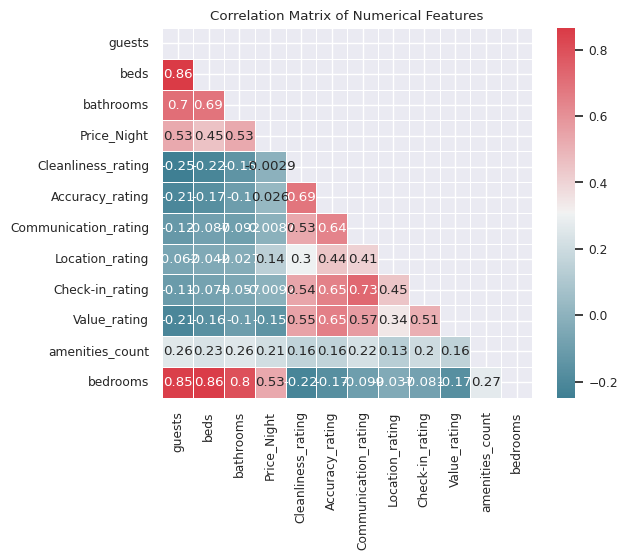

In [39]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#Create dataframe containing the relevant features.
df = airbnb_data.drop(airbnb_data.select_dtypes(include=["object"]), axis= 1)

#Compute the correlation matrix
corr = df.corr()

#Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True

#Set everything up for plotting
cmap = sns.diverging_palette(220, 10, as_cmap=True)

#Draw the heatmap
sns.heatmap(corr, mask= mask, square= True, linewidths= 0.5, annot= True, cmap=cmap)

plt.yticks(rotation=0)
plt.title("Correlation Matrix of Numerical Features")
plt.show()

From the graph above, we can extract some key information about the interaction of our features. The price per night and the number of beds, bedrooms and number of guests that can stay at a property show a strong positive correlation, which makes a lot of sense. After all, the number of beds determines how many people can sleep in a property and we would expect larger properties to cost more to rent out. We can also see that the correlation between the price per night and the various ratings is very weak - meaning that having high or low ratings does not impact the price of a listing very much.

We can also find some interesting correlations between the various ratings in the dataset - baring in mind that correlation does not equal causality. For example, the check-in and communication rating seem to have a strong positive correlation. This makes sense as we can imagine that a host that communicates well and frequently with their guests will be able to provide them with all the info they need to check into the property.

We also see a positive correlation between the accuracy, value for money and check-in rating. Here the real life link between the different variables is less obvious and the same is true for the correlation between the accuracy and cleanliness rating. A possible explanation would be that hosts who put a lot more effort into runnign their listing are likely to keep the property in a better state (cleanliness rating), provide a proper description on (accuracy) and aim to make the check-in experience as smooth as possible for their guests. However, this is basically just speculation.

To drill down into our dataset even further, we can identify a few variables to focus on. In this instance we will take a closer look at the Price_Night, bedrooms and Accuracry_rating features. In order to get a better understanding, we can display the distribution of these variables both using a facet grid and boxplot. The former helps us identify whether a distribution is skewed in one direction, while the latter can help identify outliers.

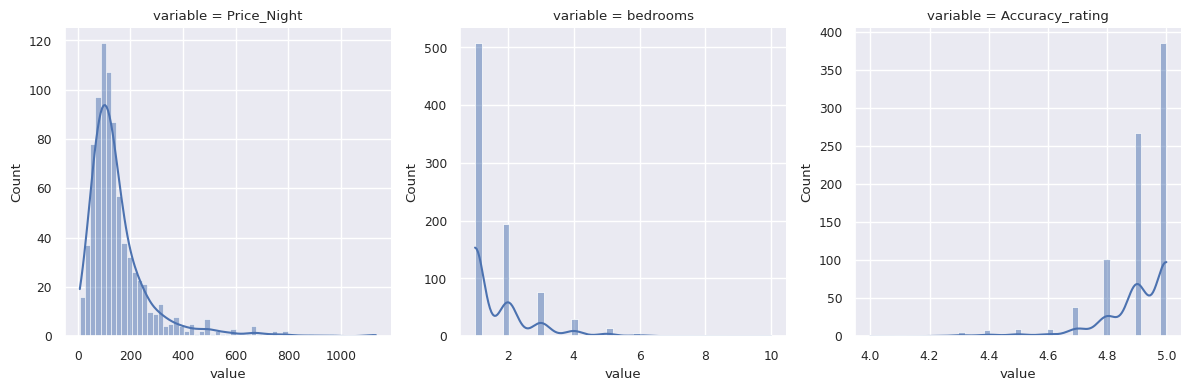

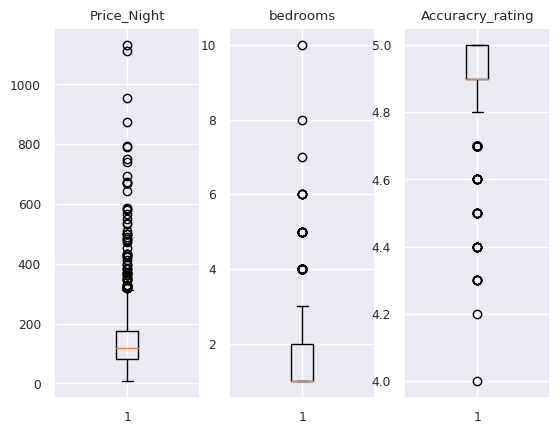

In [40]:
#First we create the facet grid graphs for our three variables

#Set numeric features
numeric_features = ["Price_Night", "bedrooms", "Accuracy_rating"]

#Plot distribution of numeric features
sns.set(font_scale=0.8)
f = pd.melt(df, value_vars=numeric_features)
g = sns.FacetGrid(f, col="variable",  col_wrap=3, sharex=False, sharey=False, height=4)
g = g.map(sns.histplot, "value", kde=True)

#Second we plot the boxplots for each variable
fig, axs = plt.subplots(1, 3)

axs[0].boxplot(df["Price_Night"])
axs[0].set_title("Price_Night")

axs[1].boxplot(df["bedrooms"])
axs[1].set_title("bedrooms")

axs[2].boxplot(df["Accuracy_rating"])
axs[2].set_title("Accuracry_rating")

plt.show()

From the graphs above we can see that all three variables have a skewed distribution and a few outliers. The price per night and number of bedrooms skews to the left, while the accuracy rating skews to the right. This makes sense as we can see there are a few very expensive listings impacting the price per night variable, while we would expect only a few properties to have more than 5 bedrooms. Regarding the accuracy rating, it might be that mainly guests who've had positive experiences actually leave a review. When deciding to remove outliers, it's important to take into consideration what the features actually mean. It might be a good idea to keep lower ratings in the dataset, even if there are just a few, since they might reflect less than ideal experiences that guests have had and, therefore, help paint a more accurate picture.

Next, let's see how removing outliers for the Price_Night feature, impacts the distribution of data.

In [ ]:
# Dection of outliers
# IQR
# Calculate the upper and lower limits
Q1 = df['Price_Night'].quantile(0.25)
Q3 = df['Price_Night'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
 
# Create arrays of Boolean values indicating the outlier rows
upper_array = np.where(df['Price_Night']>=upper)[0]
lower_array = np.where(df['Price_Night']<=lower)[0]
 
# Removing the outliers
df.drop(index=upper_array, inplace=True)
df.drop(index=lower_array, inplace=True)

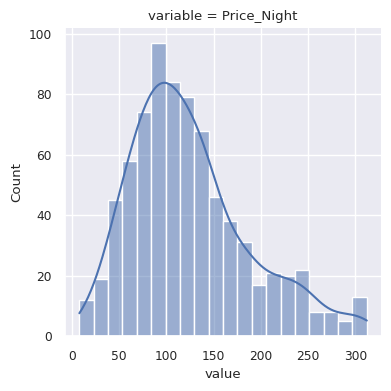

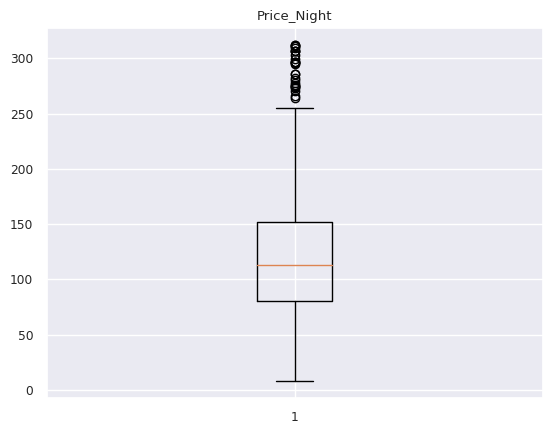

In [44]:
#Set numeric feature
numeric_features = ["Price_Night"]

#Plot distribution of numeric features
fig, axs = plt.subplots(1, 2)

sns.set(font_scale=0.8)
f = pd.melt(df, value_vars=numeric_features)
g = sns.FacetGrid(f, col="variable",  col_wrap=1, sharex=False, sharey=False, height=4)
g = g.map(sns.histplot, "value", kde=True)

#Create boxplot for variable without outliers
fig, axs = plt.subplots(1, 1)
axs.boxplot(df["Price_Night"])
axs.set_title("Price_Night")
plt.show()


Once we remove the outliers, we can see that the distribution shown by both graphs approximates a normal distribution much more closely. When training ML or ANN models, we might consider doing this to improve overall performance and generalisation.

## Categorical Data

Now that we've got a better understanding of the numerical data in the dataset, let's have a look at the category feature. One thing we can do to get an feeling for this variable is look at the frequencies with which each category occurs.

<Axes: xlabel='Category', ylabel='count'>

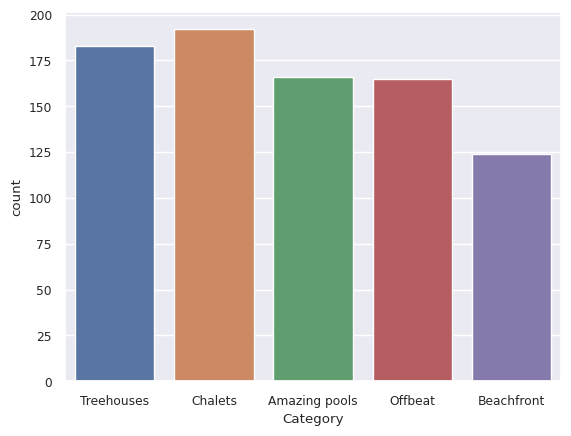

In [48]:
#Let's load the complete dataset with outliers, which we removed above
airbnb_data = pd.read_csv("./airbnb-property-listings/tabular_data/clean_tabular_data.csv")
airbnb_data.drop("Unnamed: 0", axis= 1, inplace= True)
#Drop columns that don't have numerical data, except "Category"
df = airbnb_data.drop(["ID", "Title", "Description", "Amenities", "Location", "url"], axis= 1)

#Select categorical data
categorical_features = df["Category"]

#Frequency plot of the different categories
sns.countplot(x=categorical_features)

It looks like there is a pretty even spread between the categories with Chalets being the most frequent and fewer beachfront properties compared to the rest. To get a better understanding of these categories, it might be useful to plot the destribution of the price per night for each one. Additionally, we can take a look at how the ratings compare for each type of listing.

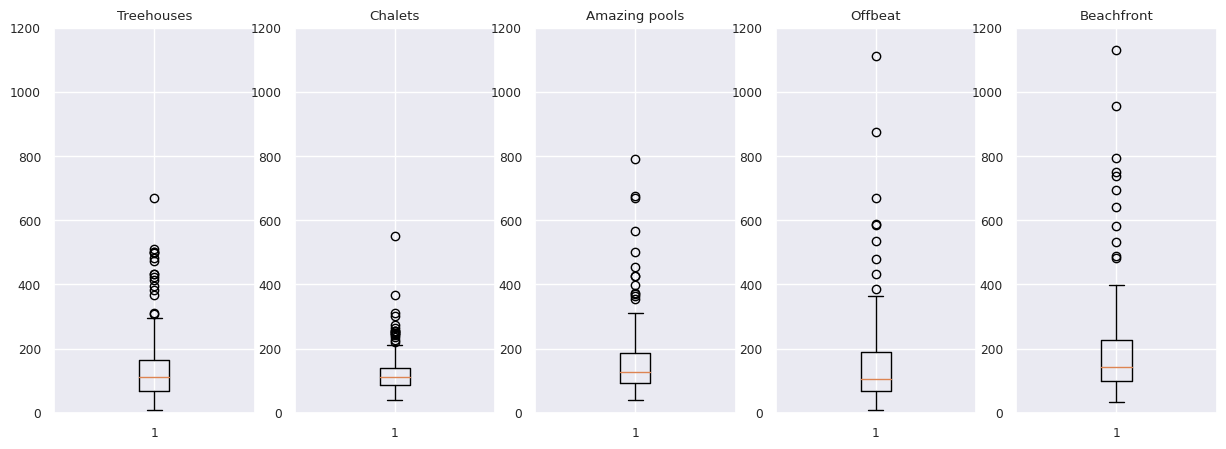

In [65]:
#Let's look at the Price_Night distribution for each category
#Assign variable containing Price_Night for each category

treehouses = df[df["Category"] == "Treehouses"]
chalets = df[df["Category"] == "Chalets"]
amaze_pools = df[df["Category"] == "Amazing pools"]
offbeat = df[df["Category"] == "Offbeat"]
beachfront = df[df["Category"] == "Beachfront"]

#Plot the boxplots for each category
fig, axs = plt.subplots(1, 5, figsize=(15, 5))
ymax = 1200

axs[0].boxplot(treehouses["Price_Night"])
axs[0].set_title("Treehouses")
axs[0].set_ylim(0, ymax)

axs[1].boxplot(chalets["Price_Night"])
axs[1].set_title("Chalets")
axs[1].set_ylim(0, ymax)

axs[2].boxplot(amaze_pools["Price_Night"])
axs[2].set_title("Amazing pools")
axs[2].set_ylim(0, ymax)

axs[3].boxplot(offbeat["Price_Night"])
axs[3].set_title("Offbeat")
axs[3].set_ylim(0, ymax)

axs[4].boxplot(beachfront["Price_Night"])
axs[4].set_title("Beachfront")
axs[4].set_ylim(0, ymax)

plt.show()


<Axes: xlabel='Category', ylabel='Value_rating'>

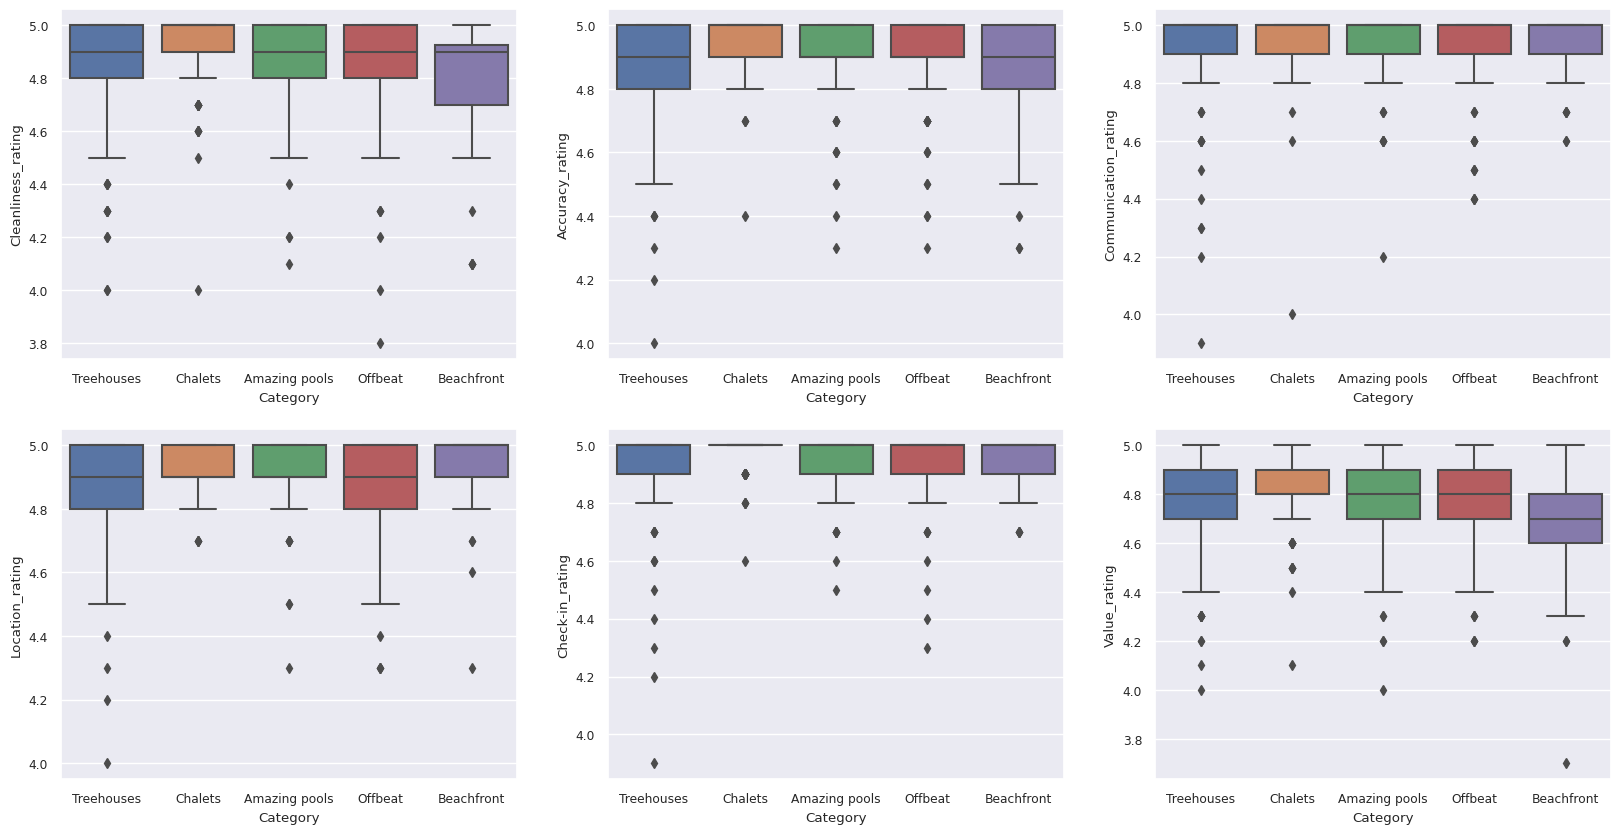

In [83]:
#Plot the boxplots for each rating category
fig, axs = plt.subplots(2, 3, figsize=(20, 10))

sns.boxplot(data= df, x= "Category", y="Cleanliness_rating", ax= axs[0, 0])
sns.boxplot(data= df, x= "Category", y="Accuracy_rating", ax= axs[0, 1])
sns.boxplot(data= df, x= "Category", y="Communication_rating", ax= axs[0, 2])
sns.boxplot(data= df, x= "Category", y= "Location_rating", ax= axs[1, 0])
sns.boxplot(data= df, x= "Category", y="Check-in_rating", ax= axs[1, 1])
sns.boxplot(data= df, x= "Category", y="Value_rating", ax= axs[1, 2])


We can now try to draw some general conclusions regarding the different categories of listings. It looks as though listings in the amazing pool- and beachfront categories are the most expensive on average, while the offbeat and amazing pool categories show the greatest number of outliers. When we take a closer look at the ratings for each category, we can see that treehouses seem to have a greater distribution of ratings across the board, with offbeat listings displaying a similar trend.

One conclusion we can draw from the data is that in general, chalets seem to be cheaper and more likely to score well in each of the ratings. When taking into consideration that they are also the most common category, as observed earlier, we can say that they are a pretty save bet for having a good stay.